In [1]:
#Lets import all the required library
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
data= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
data.shape

(907, 27)

In [7]:
#Data Analysis:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
#From data information we can see
#Data having 908 columns and 25 Rows
#Out of 25, 13 columns are float data type and 12 columns are Oject data type
#Data is having missing values also in many columns.
#for exatct count lets check the null values present in the data.

In [9]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
#Here we can see most of the data columns are having missing values
#In some columns we have colplete missing data
#latitude and longitude have 46 missing values
#other_fuel1, other_fuel2 and other_fuel3 are having large number of missing values
#commissioning_year year have 380 nul values and oweners information also missing
#wepp_id is completely missing
#some of the importtant columns having missing values near about 500, we will decide later, we need to drop or fill the colums.

#Drop all the columns which are not relevent.
#country, country_long are just the name, and here we are data only for india, so droping this will not effect on output.

In [11]:
data.drop(['country', 'country_long'], inplace= True, axis= 1)

In [29]:
#wepp_id, generation_data_source, estimated_generation_gwh also not relevent. having so many Nan values, instead of filling we will drop
#other_fuel1,other_fuel2, other_fuel3 are also having many Nan values, we will drope them also.

In [35]:
print(data.columns)

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')


In [36]:
columns_to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'url', 'geolocation_source', 'generation_data_source', 'estimated_generation_gwh', 'source']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [38]:
print(data.columns)

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')


In [39]:
data.drop(columns=['year_of_capacity_data'], inplace=True, errors='ignore')

In [42]:
#Filling null values
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [43]:
data['generation_gwh_2013'].fillna(value=data['generation_gwh_2013'].median(), inplace= True)
data['generation_gwh_2014'].fillna(value=data['generation_gwh_2014'].median(), inplace= True)
data['generation_gwh_2015'].fillna(value=data['generation_gwh_2015'].median(), inplace= True)
data['generation_gwh_2016'].fillna(value=data['generation_gwh_2016'].median(), inplace= True)
data['generation_gwh_2017'].fillna(value=data['generation_gwh_2017'].median(), inplace= True)

In [44]:
data['latitude'].fillna(value=data['latitude'].mean(), inplace= True)
data['longitude'].fillna(value=data['longitude'].mean(), inplace= True) 

In [45]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [46]:
#EDA
#Univariate analysis
#Lets plot the distrubution and conuts for targat and feature columns.

In [52]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Text(0.5, 1.0, 'Count of each primary_fuel')

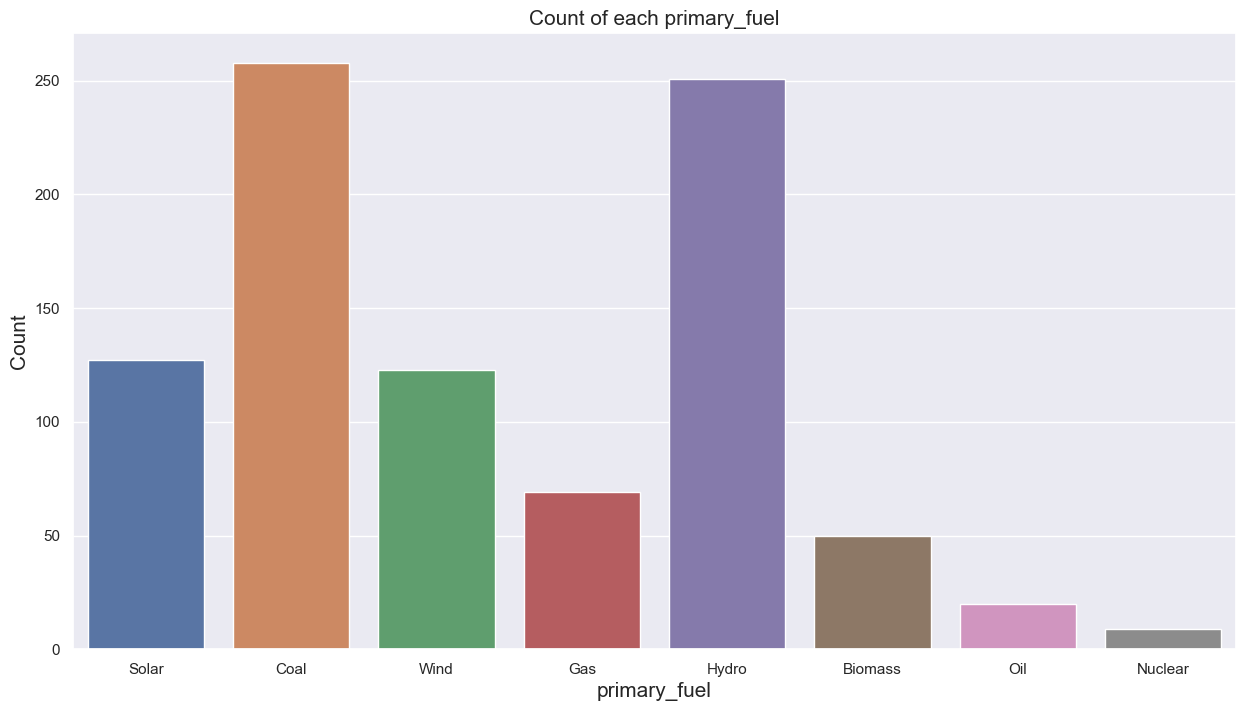

In [53]:
#Lets plot the graph
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))

sns.countplot(x='primary_fuel', data=data)  # Use x parameter to specify categorical variable
plt.xlabel('primary_fuel', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of each primary_fuel', fontsize=15)

In [54]:
#Here we can see, most of the power plants are using Coal and Hydro as the primary fuel.
#Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
#Use of solar and wind also considerable.

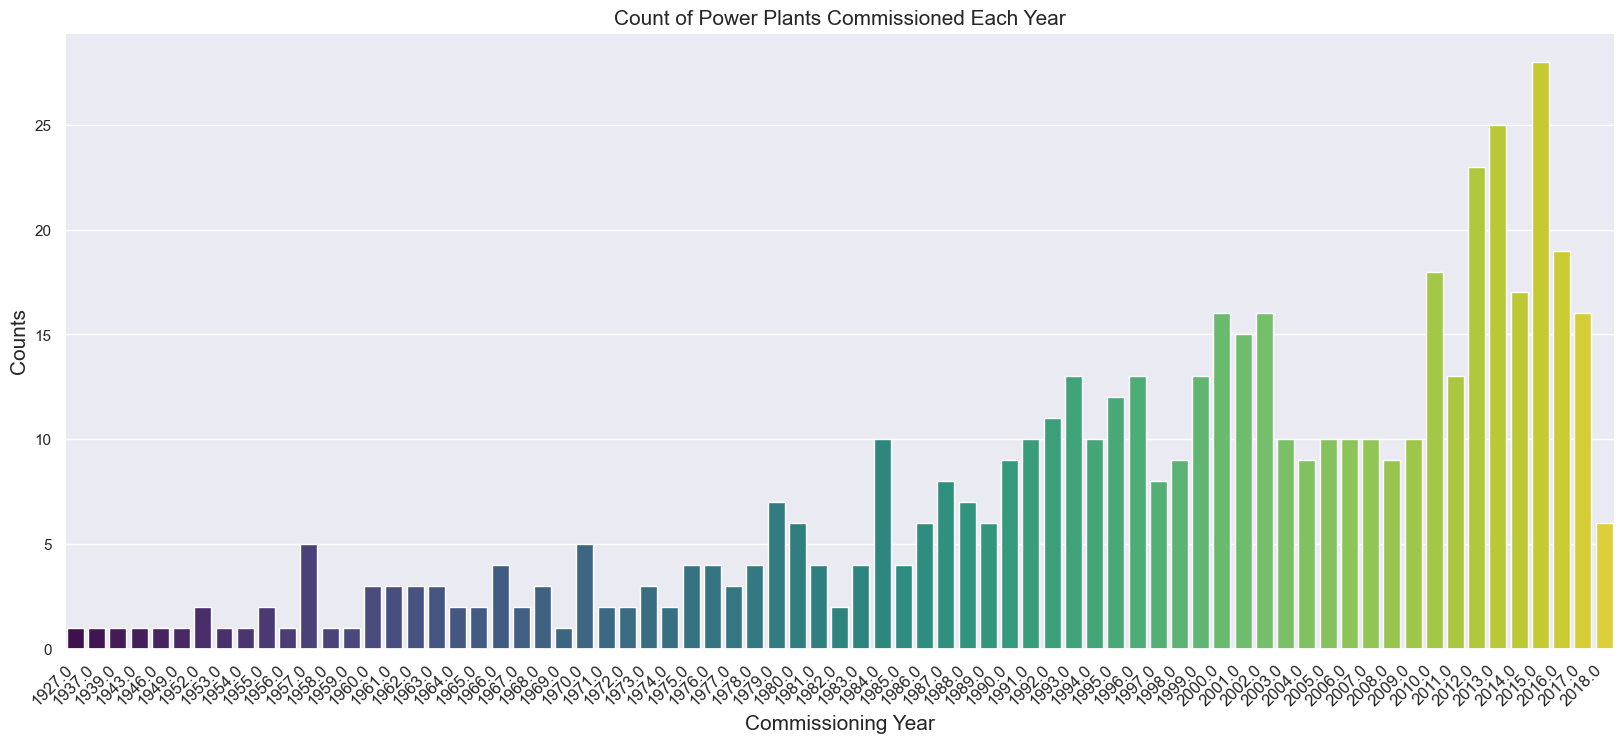

In [57]:
plt.figure(figsize=(20, 8))
sns.countplot(x='commissioning_year', data=data, palette='viridis')  # Use x parameter to specify categorical variable
plt.xlabel('Commissioning Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.title('Count of Power Plants Commissioned Each Year', fontsize=15)
plt.show()

In [58]:
#Here we can see first power plant in India starts in 1927.
#The count is very low till 1956.
#From 1957 to 1983 there is contineous developmet of 3 to 5 power plant every year.
#The number increases 1964 with total count of 10.
#After 1964 there conutineuos growth in power sector.
#In the year 2013 we have maximum number of Power plant, the count is more than 25.

In [59]:
data['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [60]:
#We can see ACC LTD, JK Cement LTD , and Sterling having maximum number (4) of power plants.
#Ujaas Enery having 3 power plant.
#Other having 2 or only single power plant.

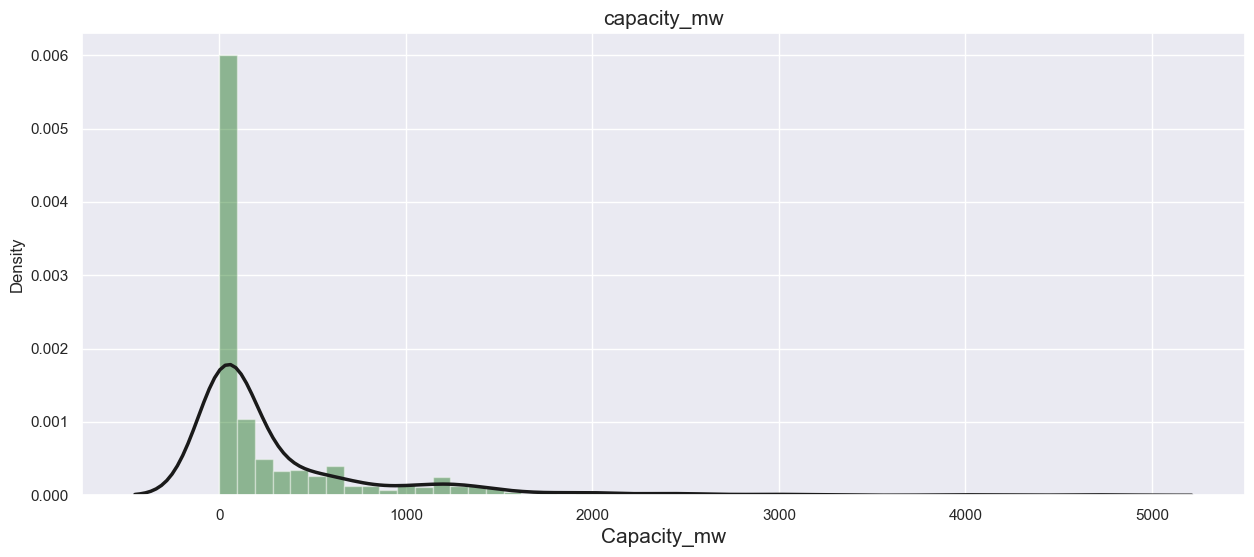

In [61]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(data['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

In [62]:
#Here we can see the probablity of capacity greater than 1000 is less.
#Data is not normaly distributed.
#Data having outliers.

In [69]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 294.6/294.6 kB 957.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.6/7.6 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


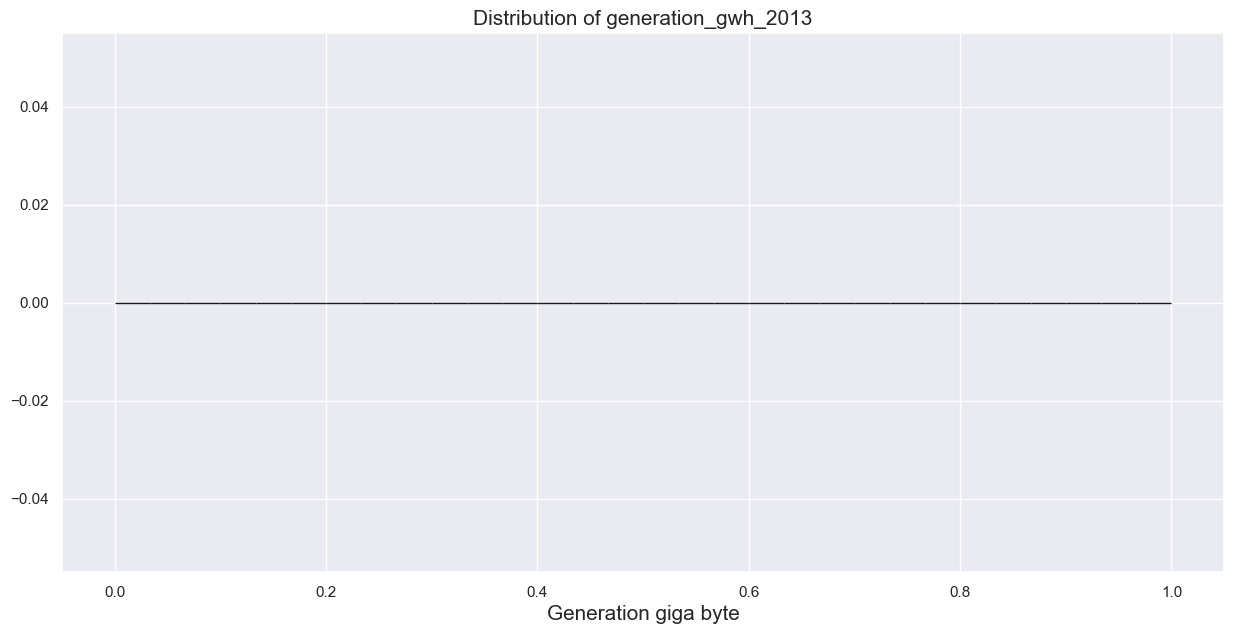

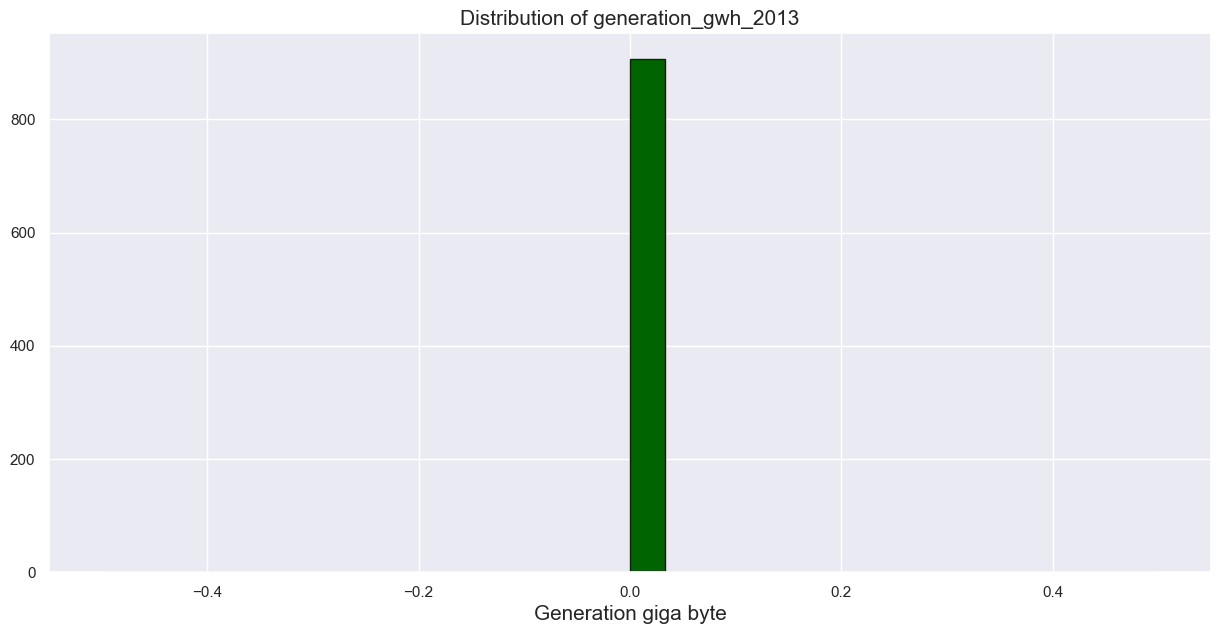

In [77]:
plt.figure(figsize=(15, 7))
data_cleaned = data['generation_gwh_2013'].dropna()
plt.hist(data_cleaned, bins=30, color='darkgreen', edgecolor='k')
plt.title('Distribution of generation_gwh_2013', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()
plt.figure(figsize=(15, 7))
data_filled = data['generation_gwh_2013'].fillna(0)  # You can replace 0 with any desired value
plt.hist(data_filled, bins=30, color='darkgreen', edgecolor='k')
plt.title('Distribution of generation_gwh_2013', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [78]:
#Data is not distributed normally, it is having skewness.

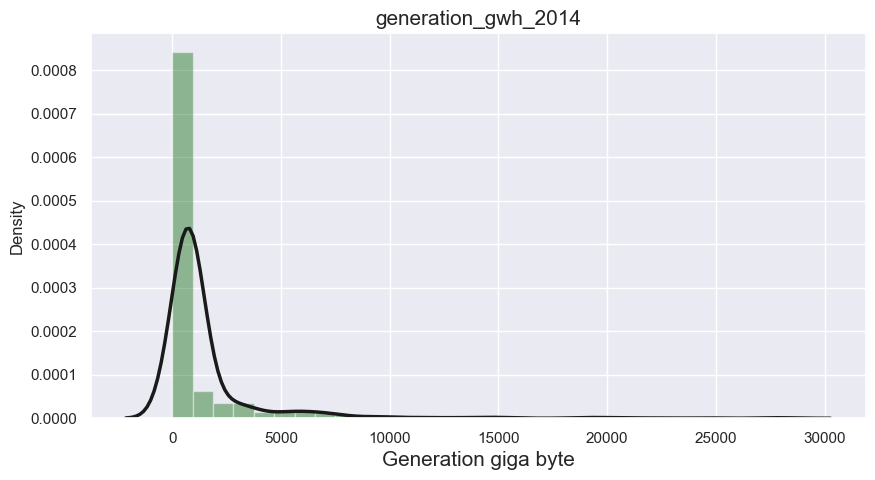

In [80]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [82]:
#Data is not distributed normally, it is having skewness.

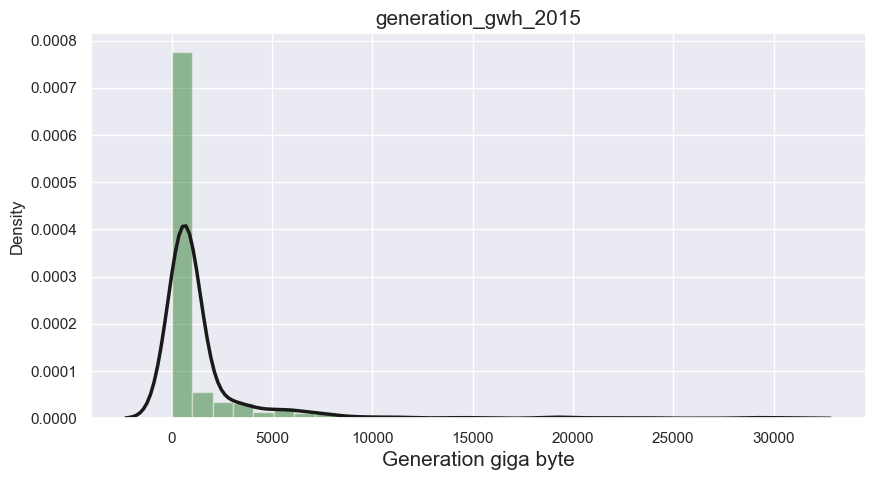

In [81]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [83]:
#Data is not distributed normally, it is having skewness.

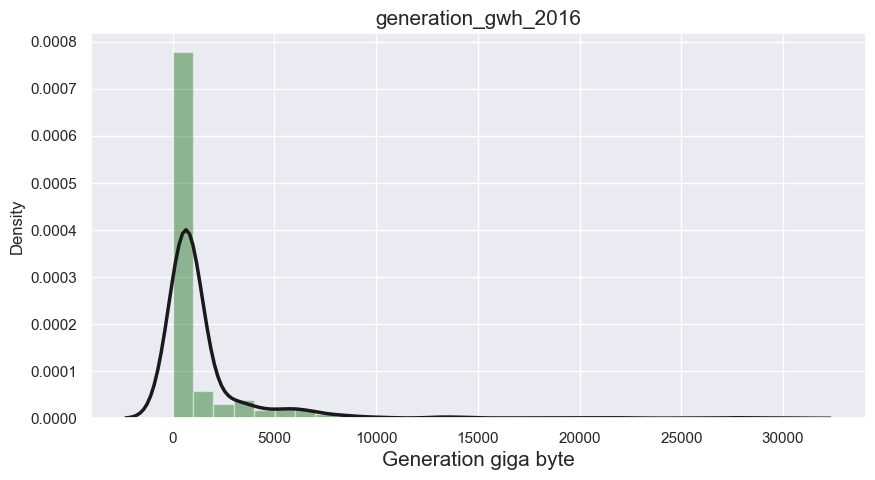

In [84]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [85]:
#Data is not distributed normally, it is having skewness.

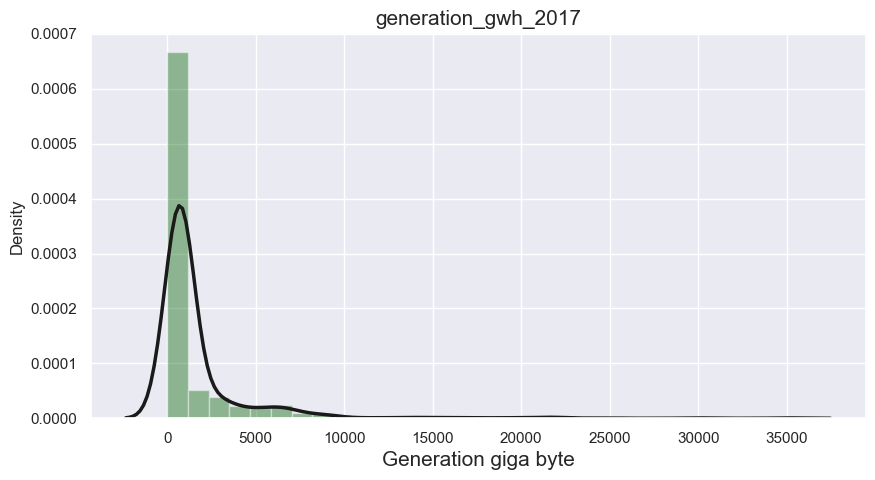

In [86]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [87]:
#Data is not distributed normally, it is having skewness.

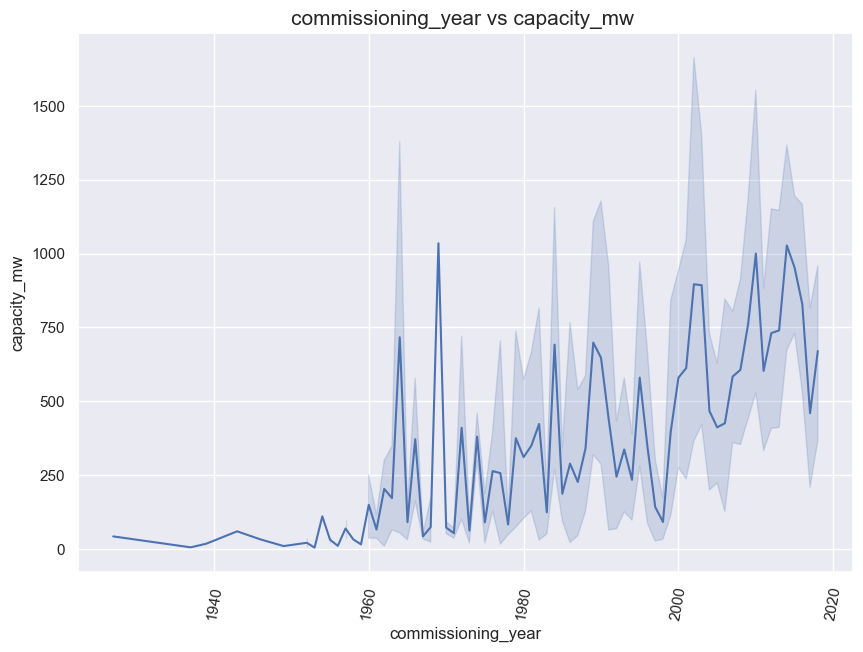

In [89]:
#Bivariate Analysis
#In bivariate analysis, we will analyse the features columns aagint target column.
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [90]:
#Here we can see with increase in the years the devlopment of plants incerases and and capcaity also incresed.

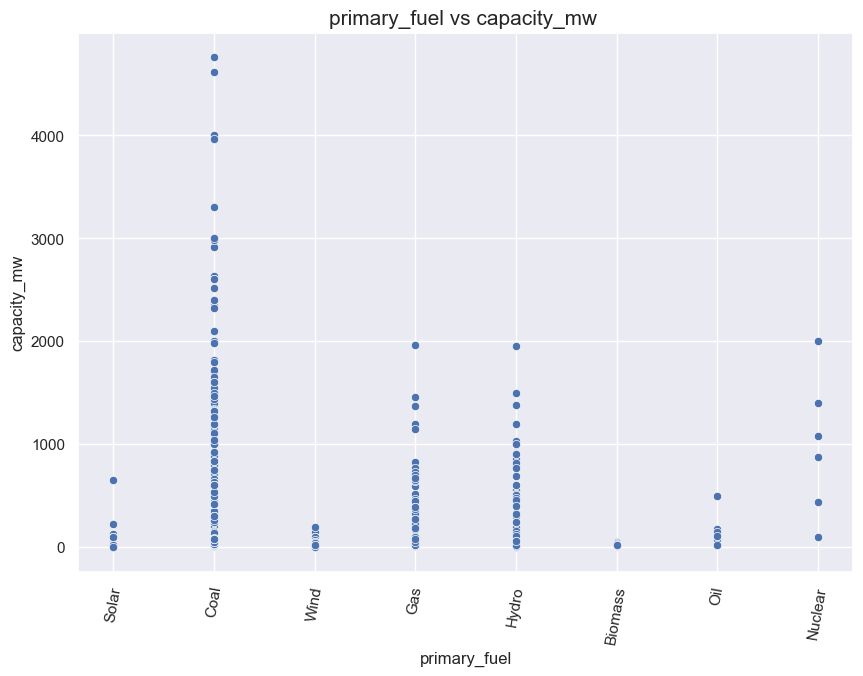

In [91]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [92]:
#We can see most of the power capacity is due to coal.

In [94]:
print(data.columns)

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')


In [95]:
print(data.head())  # Print the first few rows of your DataFrame

                       name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel  commissioning_year                 owner  generation_gwh_2013  \
0        Solar              2011.0           Solar Paces                  NaN   
1         Coal                 NaN  Ultratech Cement ltd                  NaN   
2         Wind                 NaN                   AES                  NaN   
3          Gas              2004.0                   NaN                  NaN   
4         Coal              2015.0                   NaN                  NaN   

   generation_gwh_2014  generation_gwh_2015  gener

In [100]:
print(data['generation_gwh_2013'].isnull().sum())

907


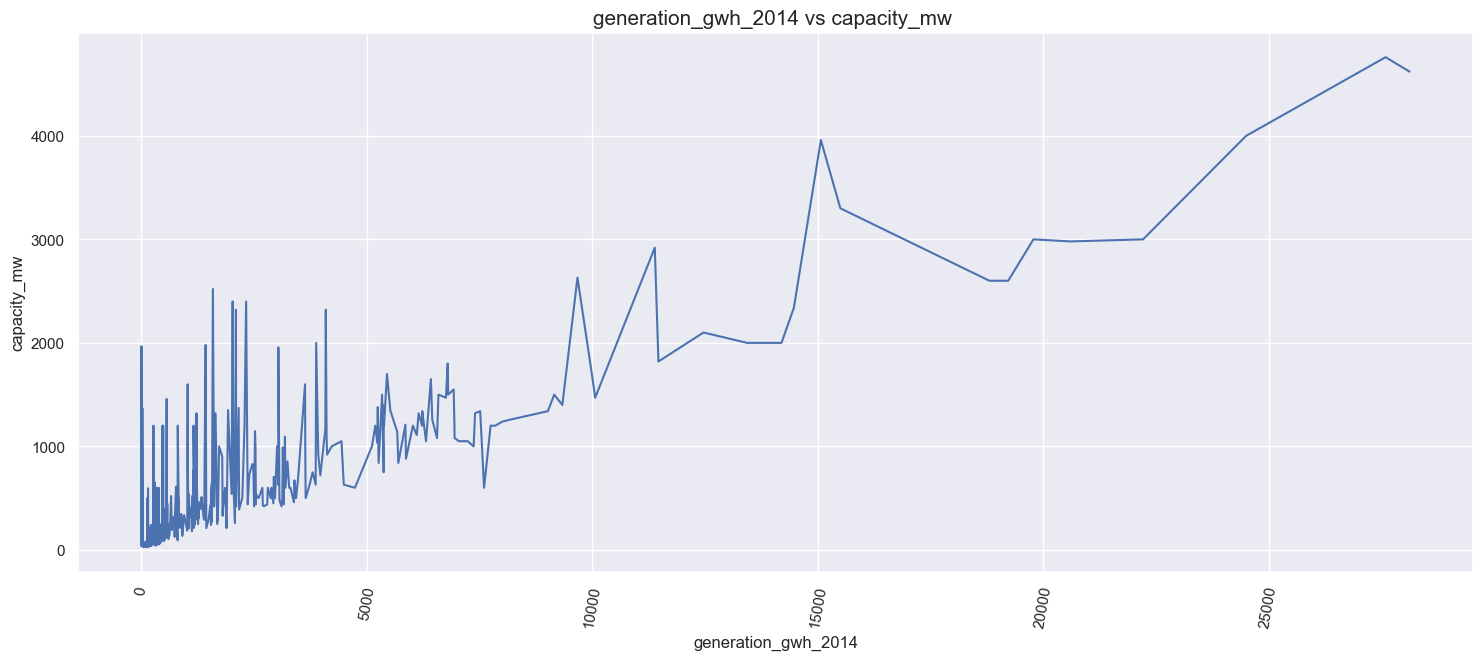

In [108]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [109]:
#with higher capacity, generation_gwh_2014 also incresing.

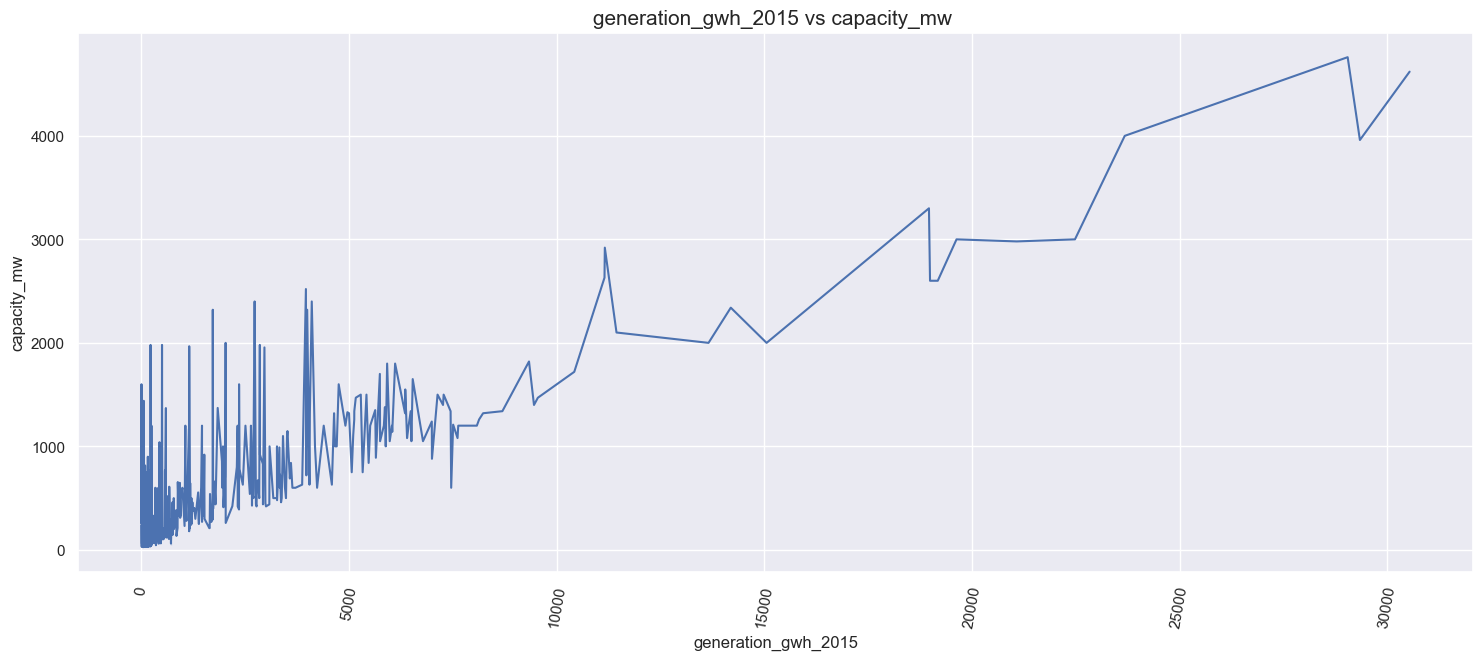

In [110]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [111]:
#with higher capacity, generation_gwh_2015 also incresing.

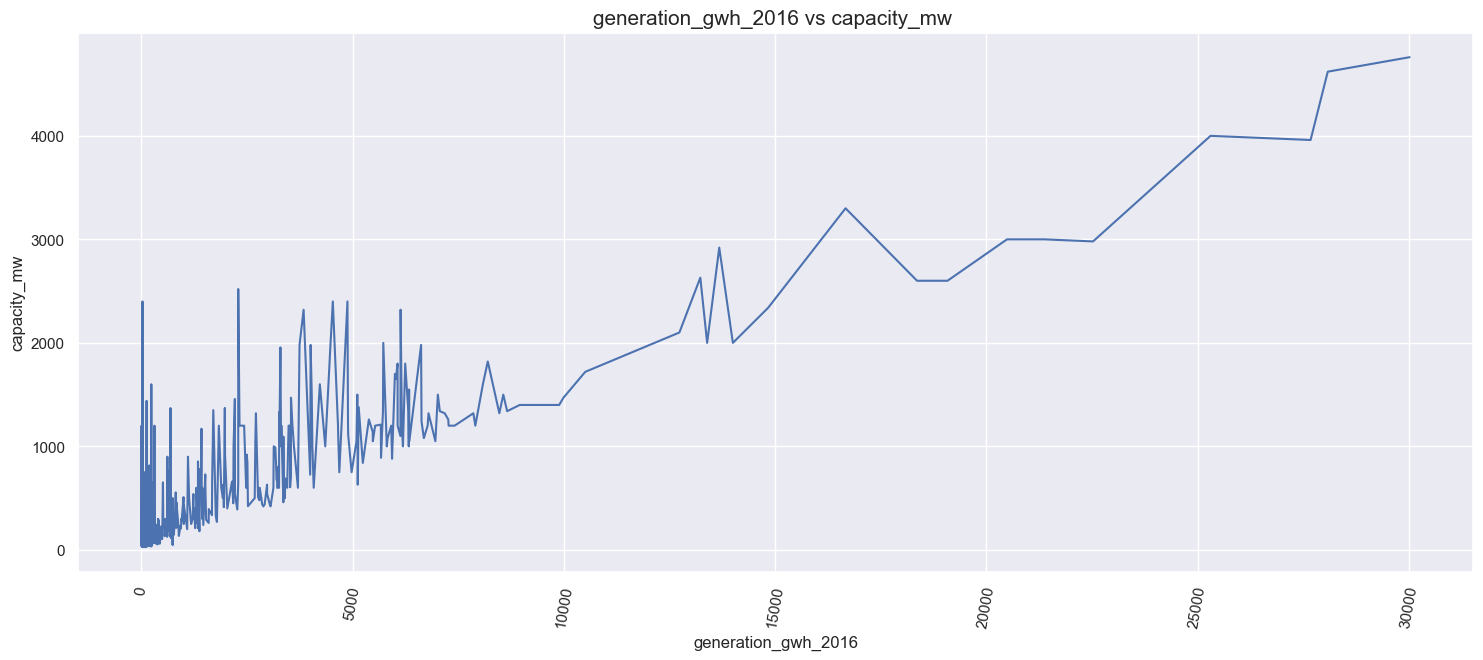

In [112]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [113]:
#with higher capacity, generation_gwh_2016 also incresing.

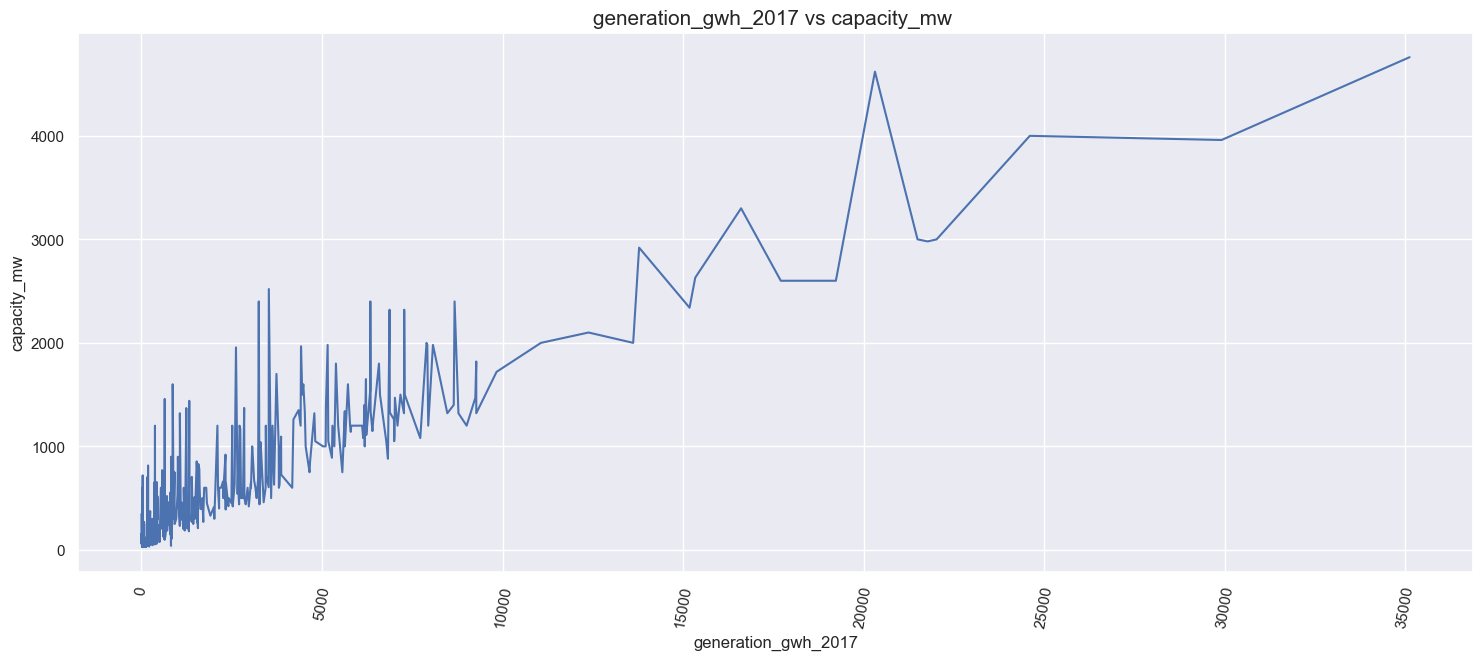

In [114]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [117]:
#with higher capacity, generation_gwh_2017 also incresing.

In [118]:
data.head(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN


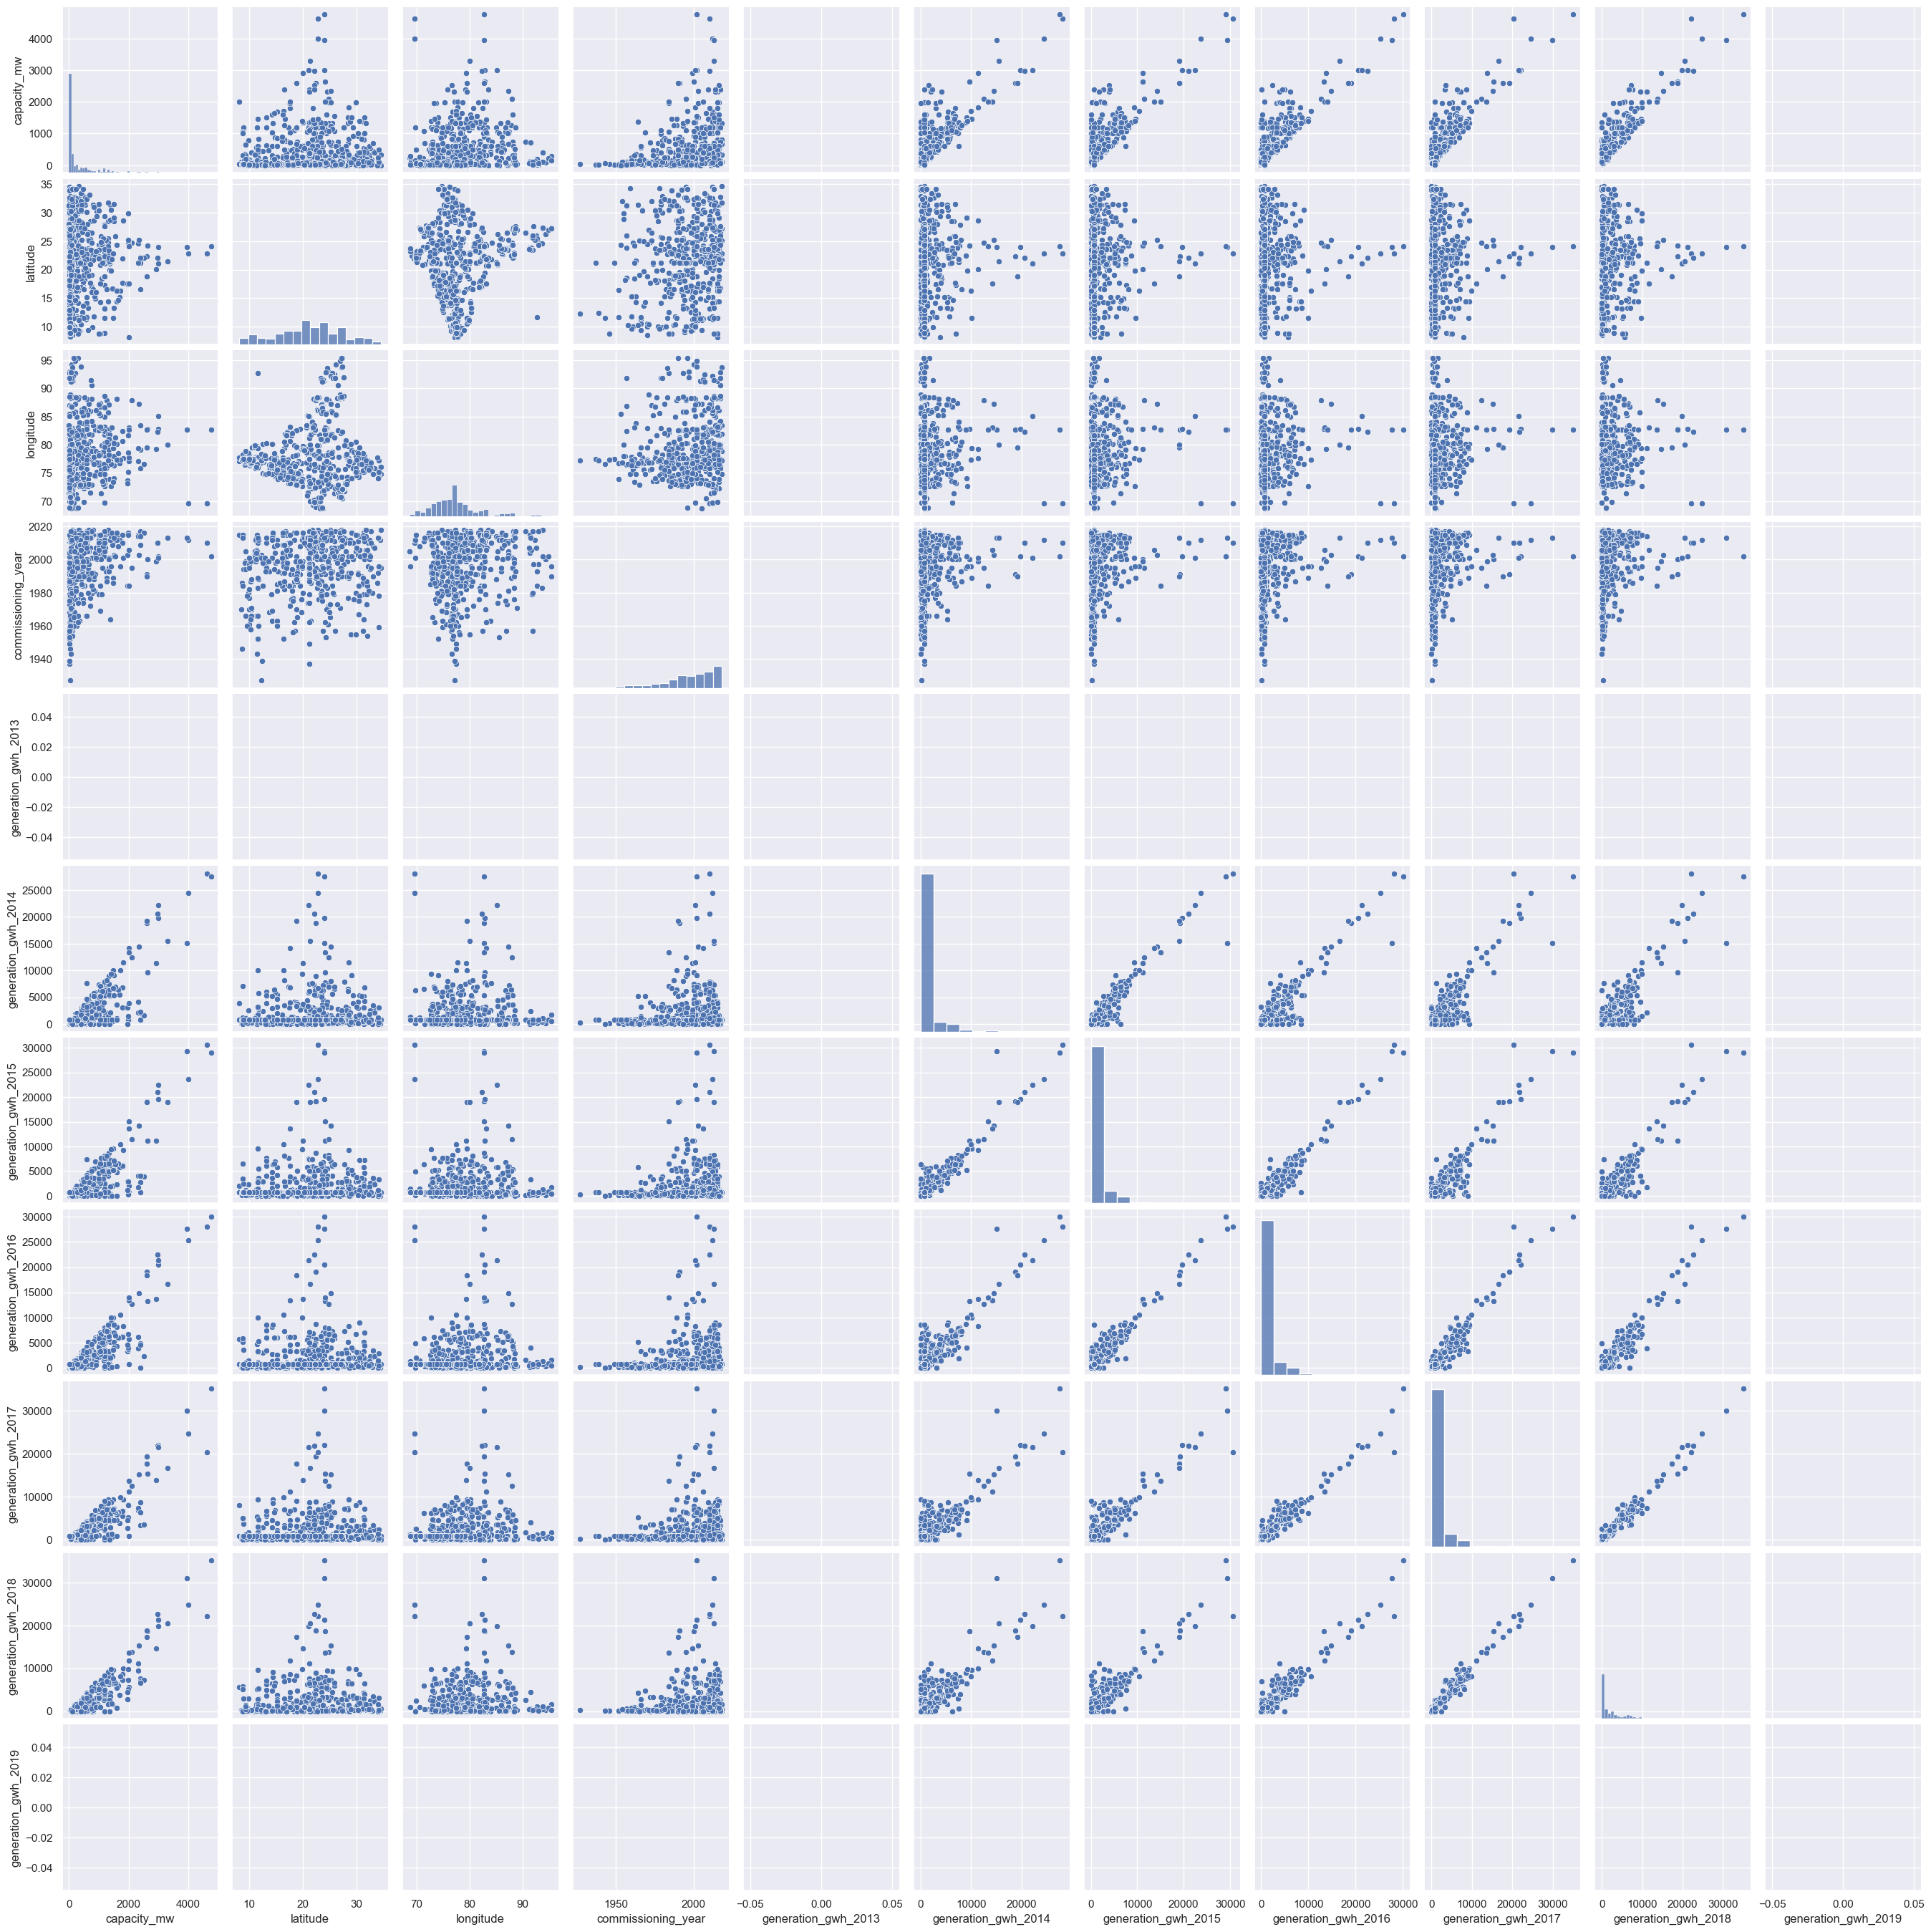

In [119]:
#Multivariate analysis
sns.pairplot(data)

In [120]:
#EDA Summary
#capacity_mw: we can see capacity is mostly dependent on Coal.
#latitude & longitude : They are not playing very good role in capacity_mw.
#primary_fuel: Mostly Coal is used as primary fuel.
#commissioning_year: we can see capacity incerases after 2000.
#generation_gwh_2013-2017: we can see generation growth is almost same for each year

#Data Processing
#Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.

In [121]:
data.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

In [122]:
#Encoding Target columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['primary_fuel']=le.fit_transform(data['primary_fuel'])

In [123]:
data.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN


In [124]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,0.050984,0.195882,-0.380395,NaN,0.793497,0.819676,0.853008,0.868338,0.901918,NaN
latitude,0.050984,1.000000,0.036362,-0.010204,NaN,0.058594,0.053869,0.047677,0.057897,0.041414,NaN
longitude,0.195882,0.036362,1.000000,-0.347948,NaN,0.104649,0.121513,0.143459,0.151712,0.050548,NaN
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,NaN,-0.240656,-0.249304,-0.259708,-0.263599,-0.421518,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,NaN,1.000000,0.963719,0.935067,0.904075,0.887050,NaN
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,NaN,0.963719,1.000000,0.973231,0.940229,0.927664,NaN
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,NaN,0.935067,0.973231,1.000000,0.973909,0.961997,NaN
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,NaN,0.904075,0.940229,0.973909,1.000000,0.985604,NaN
generation_gwh_2018,0.901918,0.041414,0.050548,-0.421518,NaN,0.887050,0.927664,0.961997,0.985604,1.000000,NaN


<Axes: >

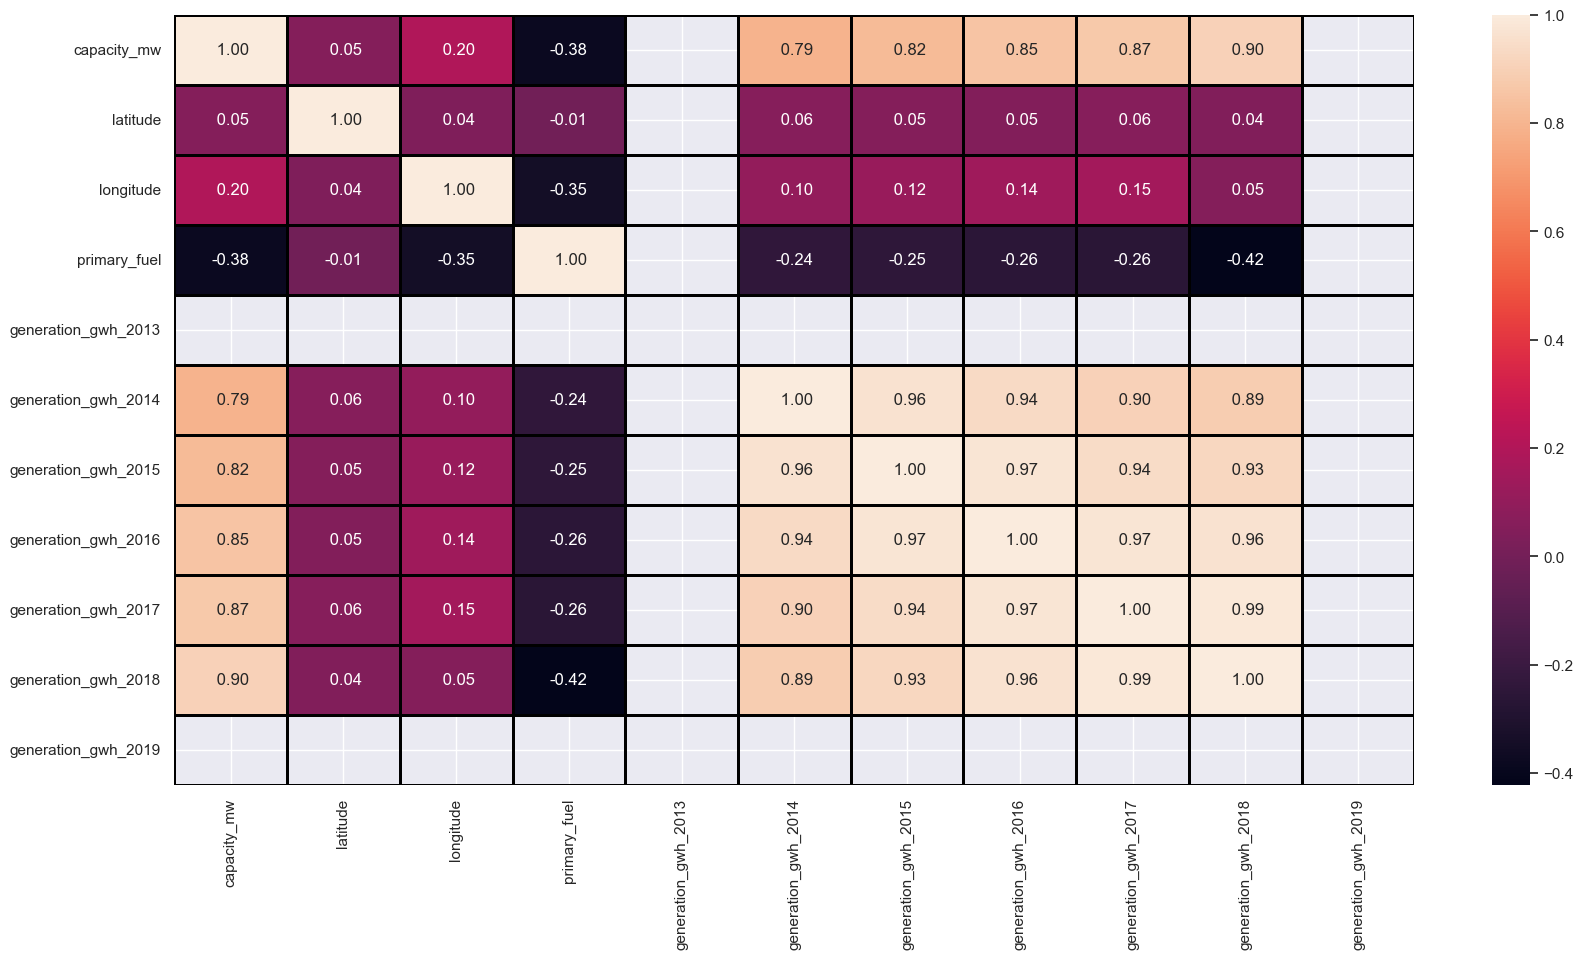

In [125]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

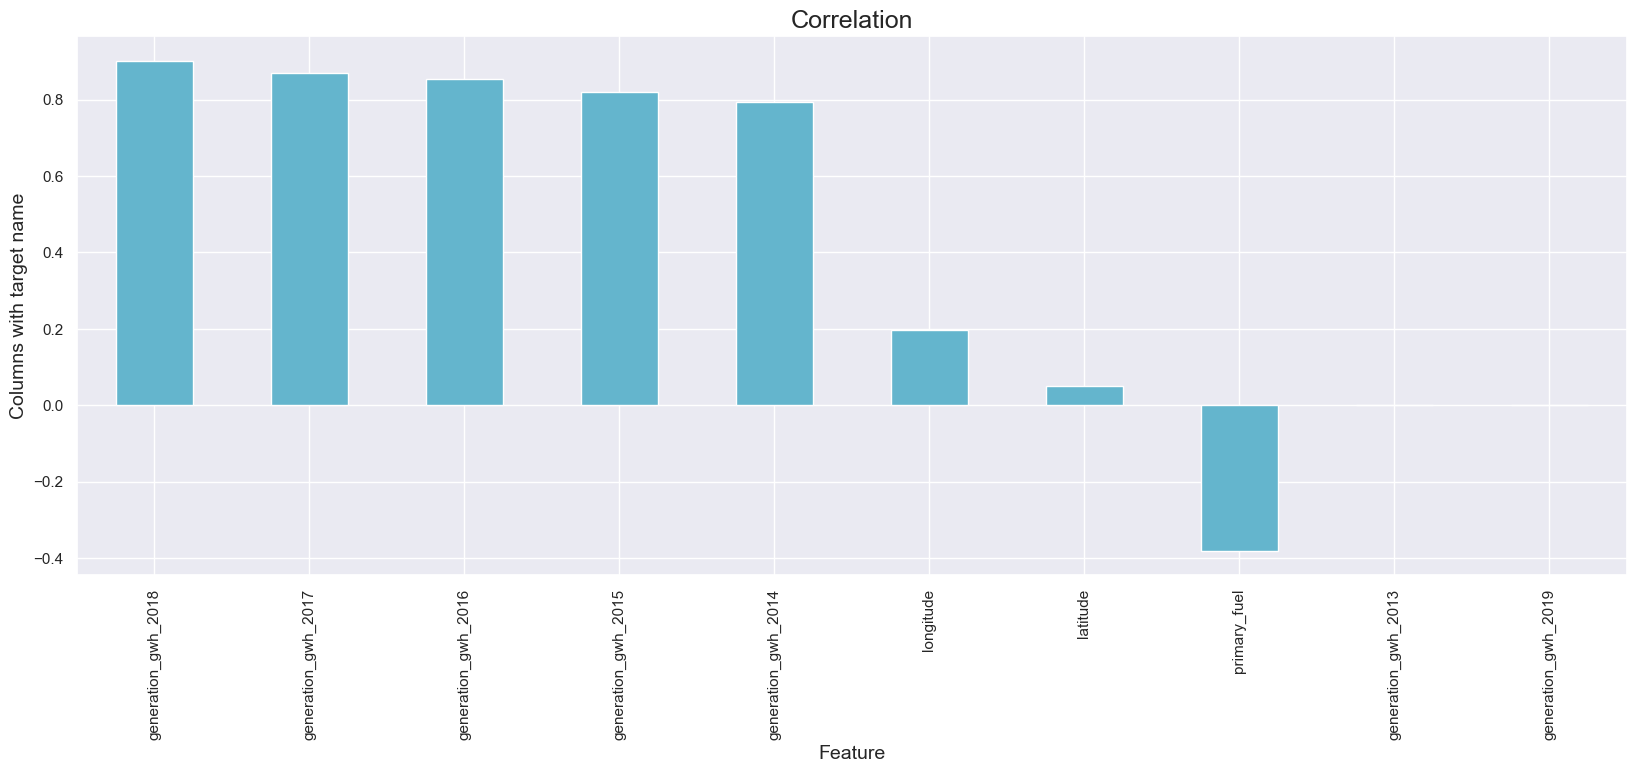

In [126]:
plt.figure(figsize=(20,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [127]:
#Here we can see only primary fuel is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

#From heat map we can see generation growth columns are highly correlacted with each other.

<Axes: >

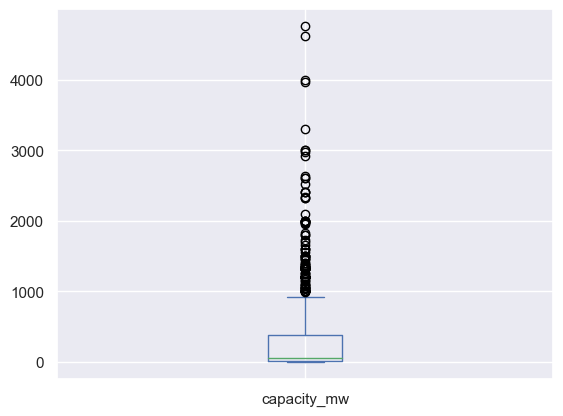

In [128]:
#Checking outliers
data['capacity_mw'].plot.box()

<Axes: >

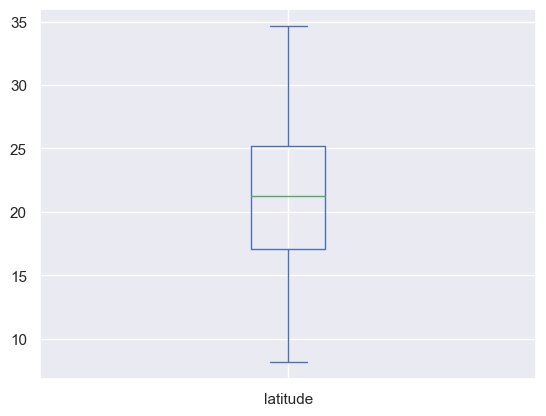

In [129]:
data['latitude'].plot.box()

<Axes: >

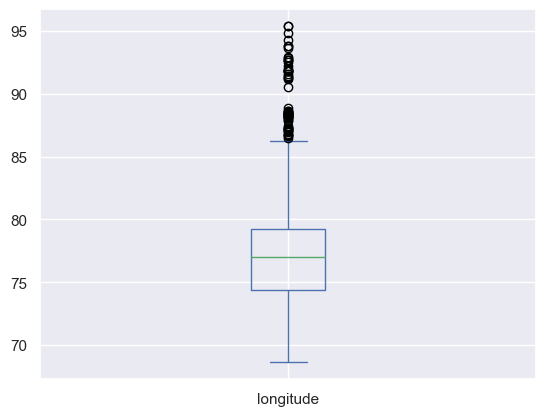

In [130]:
data['longitude'].plot.box()

<Axes: >

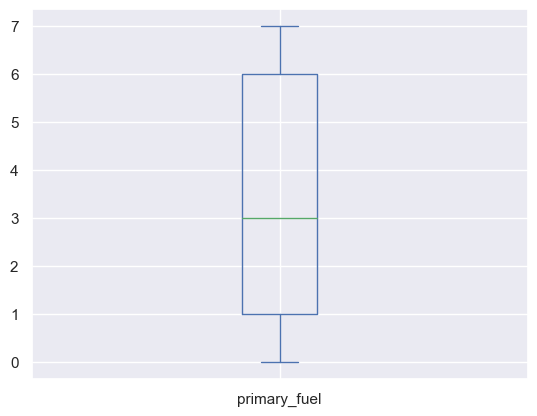

In [131]:
data['primary_fuel'].plot.box()

<Axes: >

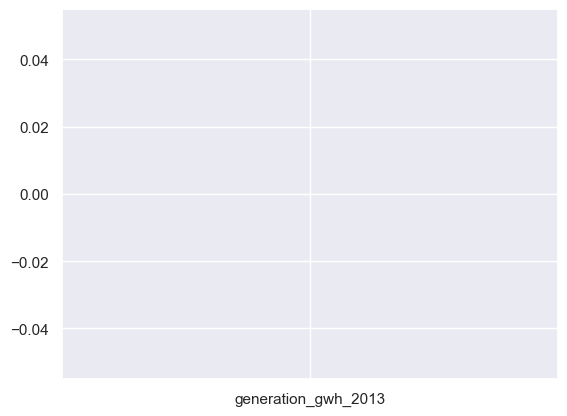

In [132]:
data['generation_gwh_2013'].plot.box()

<Axes: >

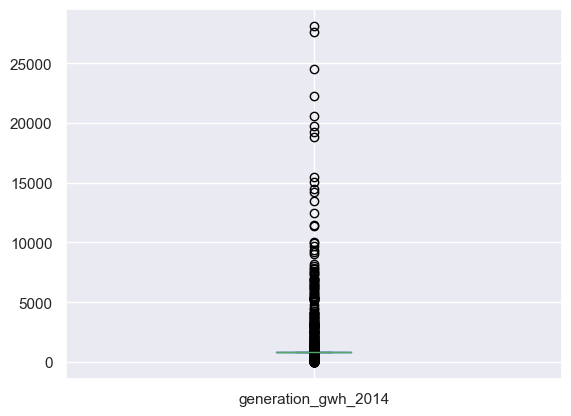

In [133]:
data['generation_gwh_2014'].plot.box()

<Axes: >

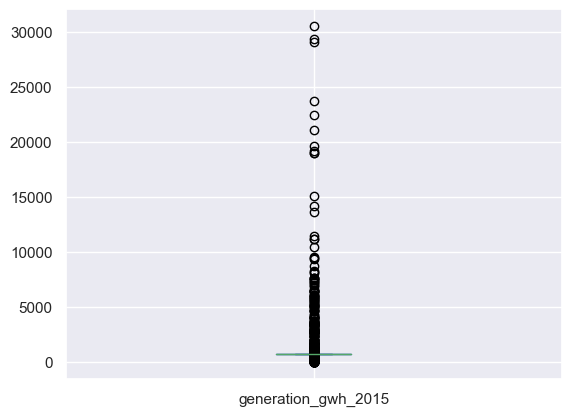

In [134]:

data['generation_gwh_2015'].plot.box()

<Axes: >

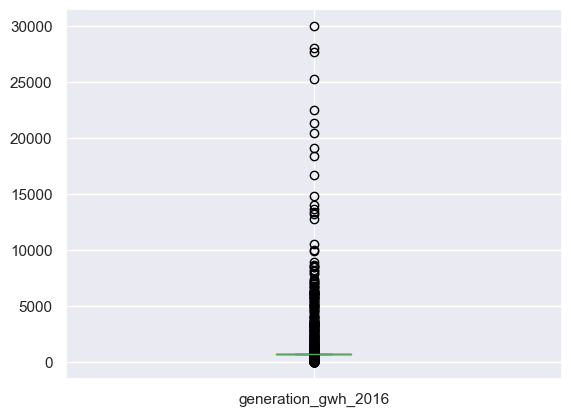

In [135]:
data['generation_gwh_2016'].plot.box()

<Axes: >

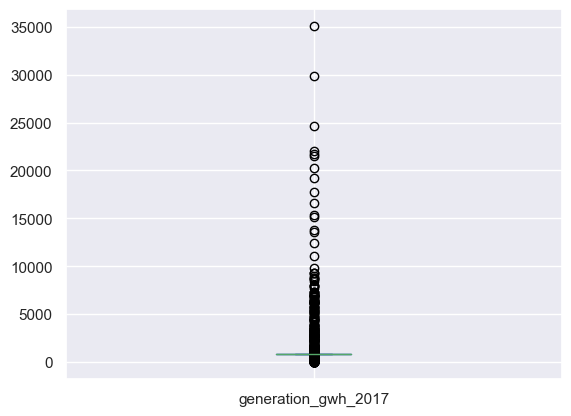

In [136]:
data['generation_gwh_2017'].plot.box()

In [137]:
#Here we can see boxplot indicates that we have outliers, these are present mostly in generation_gwh columns.

In [138]:
#Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))

In [139]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 158, 179, 183,
       209, 209, 209, 209, 209, 244, 308, 308, 308, 308, 308, 323, 333,
       340, 360, 363, 364, 364, 364, 364, 364, 375, 416, 427, 482, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 499, 519, 532, 546,
       577, 623, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       695, 695, 695, 695, 695, 721, 721, 721, 721, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 788, 808,
       808, 808, 808, 808, 818, 847, 880, 880, 880, 880, 880], dtype=int64), array([0, 6, 7, 8, 0, 5, 6, 7, 8, 0, 5, 2, 2, 0, 5, 6, 7, 8, 2, 0, 5, 6,
       7, 8, 2, 2, 2, 2, 0, 0, 5, 6, 7, 8, 0, 2, 2, 0, 0, 5, 6, 7, 8, 0,
       5, 6, 7, 8, 2, 2, 5, 2, 2, 5, 2, 0, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0,
       5, 6, 7, 8, 5, 6, 7, 8, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0, 0, 5, 6, 7,
       8, 0, 0, 5, 6, 7, 8, 2, 2, 0, 5, 6, 7, 8], dtype=int64))


In [140]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(907, 11)
(0, 11)


In [141]:
Loss_percentage=(908-866)/908*100
print(Loss_percentage)

4.6255506607929515


In [142]:
#Data loss is less than the 1ess than 10 percent, we canproceed with new data.

In [146]:
file_path = "https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"
delimiter = ","
df = pd.read_csv(file_path, delimiter=delimiter)
print(df.shape)

(907, 27)


In [147]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#Removing skewness
df.skew()

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'IND' is a string column, you may want to drop or preprocess it
# Here, we drop all non-numeric columns for simplicity
numeric_columns = df.select_dtypes(include=['number']).columns
x_numeric = df[numeric_columns]

# Assuming 'capacity_mw' is the target variable
y = df['capacity_mw']

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
x_categorical = df[categorical_columns]

# Create a column transformer to separately preprocess numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline with the column transformer and any subsequent steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # Add more steps as needed
])

# Apply the pipeline to preprocess the data
x_preprocessed = pipeline.fit_transform(df)

# Now x_preprocessed contains the preprocessed data, and you can use it for further analysis.

In [152]:
X=pd.DataFrame(data=x)

In [153]:
#Scaling the data Using StandardScaler.
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [154]:
#Our data is now scaled, in next step we will check multicollinearity.

In [155]:
#VIF calculation

In [156]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [174]:
dfx = pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
                                     'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                                     'generation_gwh_2016', 'generation_gwh_2017',
                                     'additional_column1', 'additional_column2', 'additional_column3',
                                     'additional_column4', 'additional_column5', 'additional_column6',
                                     'additional_column7'])
dfx = pd.DataFrame(data=X)

In [178]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    # Replace infinite values with a large finite value
    x.replace([np.inf, -np.inf], np.nan, inplace=True)
    x.fillna(1e20, inplace=True)  # You can adjust this value based on your data

    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF FACTOR'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

# Replace 'dfx' with your actual DataFrame
calc_vif(dfx)

,variables,VIF FACTOR
0,0,1.346260
1,1,inf
2,2,inf
3,3,0.000000
4,4,29.358011
5,5,0.000000
6,6,31.346639
7,7,0.000000
8,8,9.884449
9,9,28.189003


In [180]:
print(dfx.columns)

RangeIndex(start=0, stop=15, step=1)


In [184]:
# Convert column names to lowercase and remove leading/trailing whitespaces only for string columns
dfx.columns = dfx.columns.to_series().apply(lambda x: x.lower().strip() if isinstance(x, str) else x)

# Drop the column if it exists
if 'generation_gwh_2016' in dfx.columns:
    dfx.drop('generation_gwh_2016', axis=1, inplace=True)

In [185]:
calc_vif(dfx)

,variables,VIF FACTOR
0,0,1.346260
1,1,inf
2,2,inf
3,3,0.000000
4,4,29.358011
5,5,0.000000
6,6,31.346639
7,7,0.000000
8,8,9.884449
9,9,28.189003


In [186]:
x=dfx

In [187]:
#Vif is less than 10 we can proceed for model development

In [188]:
#Model Development
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [189]:
#1.LinearRegression
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 129 The model perform very well
At random State: 129
Training r2_score 25.62132984333362
Testing r2 score  25.63477789922676
At Random state 166 The model perform very well
At random State: 166
Training r2_score 25.22843797738362
Testing r2 score  25.153675753800098
At Random state 245 The model perform very well
At random State: 245
Training r2_score 25.639325078842134
Testing r2 score  25.63017218112226
At Random state 834 The model perform very well
At random State: 834
Training r2_score 25.561323603801135
Testing r2 score  25.585862455556974


In [190]:
#At random State: 245
#Training r2_score 25.639325078842134
#Testing r2 score 25.153675753800098

In [191]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 245)

In [192]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.25630172181122257


In [193]:
#Lets check model for cross validation
#Cross Validation of Model

In [194]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 20.594743564528077 and Accuracy score is 25.63017218112226
At cross fold 3 the Cross Val score is 22.10771649665884 and Accuracy score is 25.63017218112226
At cross fold 4 the Cross Val score is 17.578946652342644 and Accuracy score is 25.63017218112226
At cross fold 5 the Cross Val score is 23.904397801738853 and Accuracy score is 25.63017218112226
At cross fold 6 the Cross Val score is 20.764161913741205 and Accuracy score is 25.63017218112226
At cross fold 7 the Cross Val score is 24.181422568716965 and Accuracy score is 25.63017218112226
At cross fold 8 the Cross Val score is 23.901409869618366 and Accuracy score is 25.63017218112226
At cross fold 9 the Cross Val score is 17.2592642827582 and Accuracy score is 25.63017218112226


In [195]:
#At cross fold 8 the Cross Val score is 23.901409869618366 and Accuracy score is 25.63017218112226

In [196]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 281.99857395019933
Mean Squared Error: 262950.06604171207
Root Mean Square Error: 512.7865696775922


In [197]:
#We can see cv score is very low, But it is having less diffrence with respect to other cv.
#So we can take cv=8, But model performance is low, lets try anaother model.

In [198]:
#2. Lasso

In [199]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 99.99960758289632
Cross val Score : 99.99959946107279


In [200]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 0.6477724720454026
Mean Squared Error: 1.3874726667145105
Root Mean Square Error: 1.1779102965483028


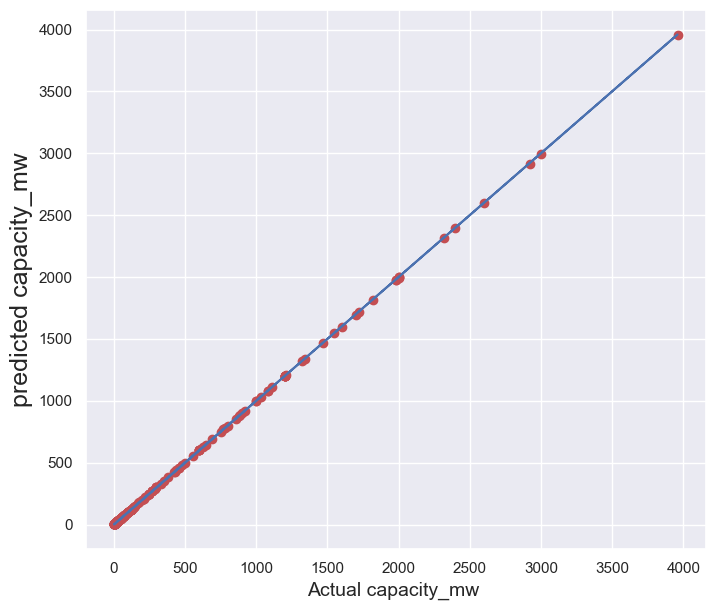

In [201]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [202]:
#R2 score: 99.99960758289632
#Cross val Score : 99.99959946107279
#Both score having big diffrence, Modle is not performing well.

In [203]:
#3. Ridge
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  99.99966188368049
Cross val Score -25529.845801079686


In [204]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 0.6012866901492276
Mean Squared Error: 1.1954808980026157
Root Mean Square Error: 1.0933804909557403


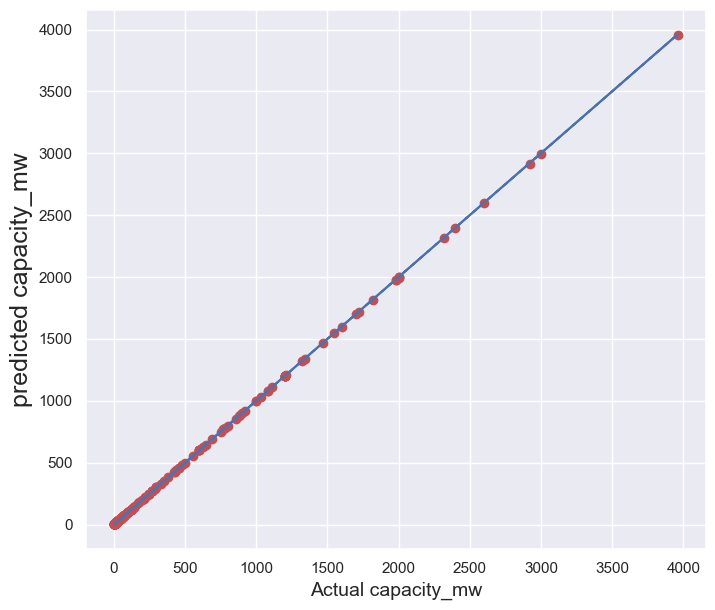

In [205]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [206]:
#r2 score:  99.99966188368049
#Cross val Score -25529.845801079686
#Model still not perfroming well. Lets try another one.

In [207]:
#3. Decision TreeRegressor

In [208]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 99.0455773111607
Cross Val Score: 99.3231082697524


In [209]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 9.687014652014653
Mean Squared Error: 3374.560845739927
Root Mean Square Error: 58.090970432072545


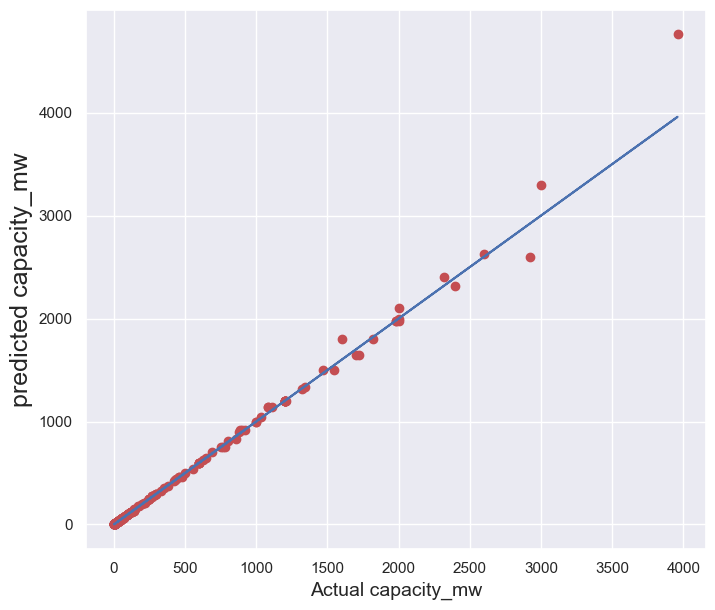

In [210]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [211]:
#R2 Score: 99.0455773111607
#Cross Val Score: 99.3231082697524
#Still the diffrence is very big as compare to linear model, Modle performance is poor.

In [212]:
#4. KNeighborsRegressor

In [213]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 92.68917701114712
Cross val Score : 91.80748802050496


In [214]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 76.16048278388278
Mean Squared Error: 25848.94229444703
Root Mean Square Error: 160.7760625666863


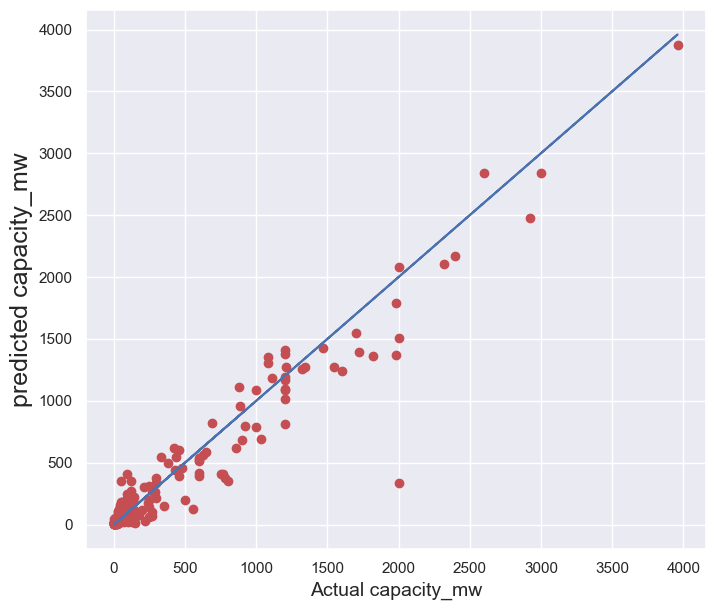

In [215]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [216]:
#R2 Score: 92.68917701114712
#Cross val Score : 91.80748802050496
#Still the diffrence in the score is high, as compare to linear model, Modle performance is very low.

In [217]:
#5. Ensemble Techniques

In [218]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 99.29530141197712
Cross val Score : 99.41064705600255


In [219]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 7.947098021978024
Mean Squared Error: 2491.6091067388606
Root Mean Square Error: 49.91602054189477


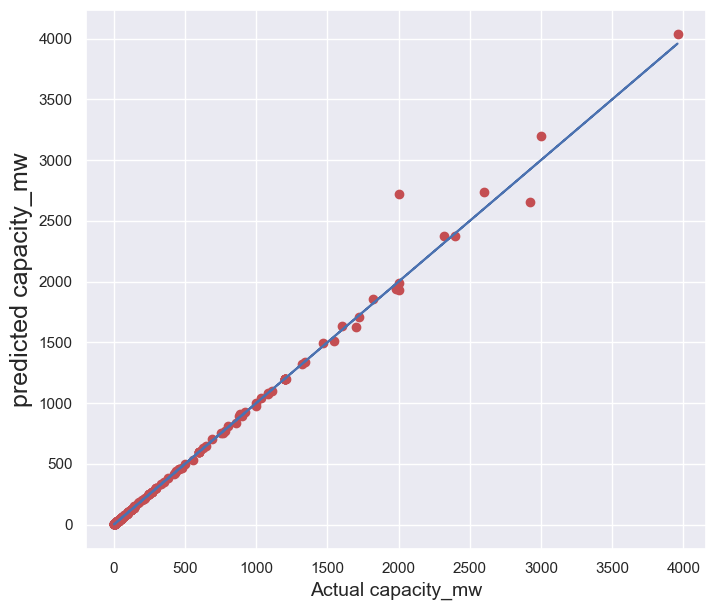

In [220]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [221]:
#R2 score: 99.29530141197712
#Cross val Score : 99.41064705600255
#Diffrence in the scores are very less as compare to other models, we can consider this as the best model.

In [222]:
#7. GradientBoostingRegressor

In [223]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 99.29530141197712
Cross val Score : 99.72404027835815


In [224]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 7.947098021978024
Mean Squared Error: 2491.6091067388606
Root Mean Square Error: 49.91602054189477


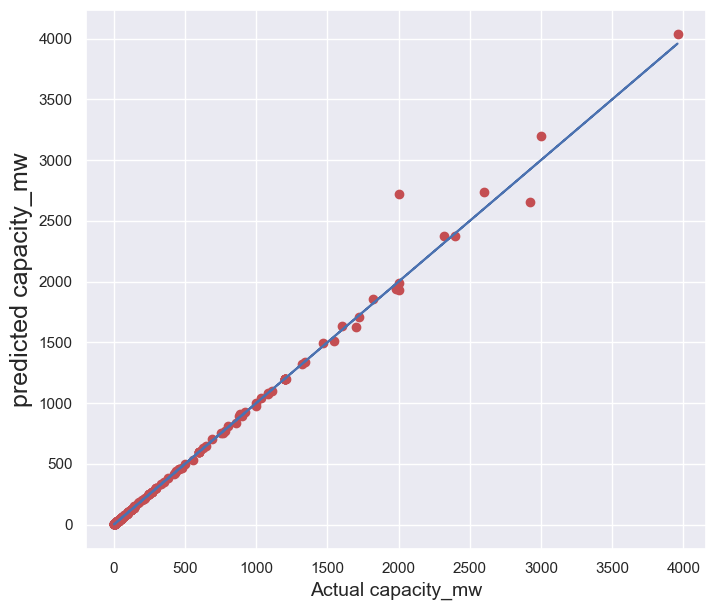

In [225]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [ ]:
#RandomForestRegressor is stil the best model with R2 score: 99.29530141197712 and Cross val Score : 99.72404027835815, lets try Hypertuning of the model.

In [ ]:
#HyperParameter Tuning

In [232]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'criterion': ['mse', 'mae', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4, 10]
}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(rf, param_distributions=parameters, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rf_random.fit(x_train_b, y_train_b)
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'criterion': 'poisson'}


In [233]:
rf=RandomForestRegressor(criterion='poisson', max_features='sqrt', min_samples_split=2, n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 96.17714209737206
Cross val Score : 95.86066967292616


In [234]:
#We can see RandomForestRegressor Having very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

In [235]:
#Saving Best Model
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))

In [236]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,25.6,26.129200
1,100.0,155.685903
2,440.0,514.622407
3,26.0,23.099333
4,1.8,3.498000
...,...,...
268,5.0,7.335333
269,144.0,193.971293
270,69.6,79.567333
271,5.0,5.521967


In [237]:
#Lets predict the primary fuel.

In [238]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
# deviding into fetures and target. 
x=df.drop('primary_fuel', axis=1)
y=df['primary_fuel']

In [241]:
x.skew()

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [244]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline

# Assuming 'x' is your DataFrame
# Separate numeric and categorical features
numeric_features = x.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = PowerTransformer()
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity with one-hot encoding

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [245]:
# Apply the transformation
x_transformed = preprocessor.fit_transform(x)

In [246]:
X2=pd.DataFrame(data=x)

In [248]:
#Scaling the data Using StandardScaler.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming 'X2' is your DataFrame with both numeric and categorical columns
numeric_features = X2.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X2.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity with one-hot encoding

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [249]:
# Apply the transformation
X2_transformed = preprocessor.fit_transform(X2)

In [250]:
X2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
#Our data is now scaled, in next step we will check multicollinearity.

In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [253]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [254]:
dfy=pd.DataFrame(data=X2, columns=['capacity_mw','latitude', 'longitude',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [255]:
dfy

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,NaN,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,NaN,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,NaN,NaN,0.994875,233.596650,865.400000
903,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN


In [258]:
def calc_vif(x):
    # Replace infinite values with a large finite value
    x.replace([np.inf, -np.inf], np.nan, inplace=True)
    x.fillna(1e20, inplace=True)  # You can adjust this value based on your data

    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF FACTOR'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

# Replace 'dfx' with your actual DataFrame
calc_vif(dfx)

,variables,VIF FACTOR
0,0,1.346260
1,1,inf
2,2,inf
3,3,0.000000
4,4,29.358011
5,5,0.000000
6,6,31.346639
7,7,0.000000
8,8,9.884449
9,9,28.189003


In [259]:
dfy.drop('generation_gwh_2016', axis=1, inplace=True)

In [260]:
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.344150
1,latitude,inf
2,longitude,inf
3,generation_gwh_2013,0.000000
4,generation_gwh_2014,9.893407
5,generation_gwh_2015,16.523967
6,generation_gwh_2017,7.432600


In [261]:
x=dfy

In [262]:
#Model Development

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [264]:
#Chosing Best Random State
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  2 The Model performing Well
At Random State 2
Training Accuracy score is- 5.517241379310345
Testing Accuracy Score is- 5.4945054945054945
At Random state  15 The Model performing Well
At Random State 15
Training Accuracy score is- 5.517241379310345
Testing Accuracy Score is- 5.4945054945054945
At Random state  24 The Model performing Well
At Random State 24
Training Accuracy score is- 5.517241379310345
Testing Accuracy Score is- 5.4945054945054945
At Random state  35 The Model performing Well
At Random State 35
Training Accuracy score is- 5.517241379310345
Testing Accuracy Score is- 5.4945054945054945
At Random state  50 The Model performing Well
At Random State 50
Training Accuracy score is- 5.517241379310345
Testing Accuracy Score is- 5.4945054945054945
At Random state  53 The Model performing Well
At Random State 53
Training Accuracy score is- 5.517241379310345
Testing Accuracy Score is- 5.4945054945054945
At Random state  58 The Model performing Well
At Random Stat

In [265]:
#At Random State 2
#Training Accuracy score is- 5.517241379310345
#Testing Accuracy Score is- 5.4945054945054945

In [266]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=5,test_size=0.20)

In [267]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.07692307692307693


In [268]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[14  0  0  0  0  0  0  0]
 [52  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0]
 [26  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

     Biomass       0.08      1.00      0.14        14
        Coal       0.00      0.00      0.00        52
         Gas       0.00      0.00      0.00         9
       Hydro       0.00      0.00      0.00        45
     Nuclear       0.00      0.00      0.00         1
         Oil       0.00      0.00      0.00         5
       Solar       0.00      0.00      0.00        30
        Wind       0.00      0.00      0.00        26

    accuracy                           0.08       182
   macro avg       0.01      0.12      0.02       182
weighted avg       0.01      0.08      0.01       182



In [269]:
#Cross validation of model

In [270]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 5.512685863212455
Accuracy Score:- 7.6923076923076925


at cv:- 3
Cross Validation scre is:- 5.512571124662135
Accuracy Score:- 7.6923076923076925


at cv:- 4
Cross Validation scre is:- 5.512455654750302
Accuracy Score:- 7.6923076923076925


at cv:- 5
Cross Validation scre is:- 5.51271932487402
Accuracy Score:- 7.6923076923076925


at cv:- 6
Cross Validation scre is:- 5.512228418728941
Accuracy Score:- 7.6923076923076925


at cv:- 7
Cross Validation scre is:- 5.512394582162024
Accuracy Score:- 7.6923076923076925


at cv:- 8
Cross Validation scre is:- 5.513507219375873
Accuracy Score:- 7.6923076923076925


at cv:- 9
Cross Validation scre is:- 5.511551155115511
Accuracy Score:- 7.6923076923076925




In [271]:
#at cv:- 8
#Cross Validation scre is:- 5.513507219375873
#Accuracy Score:- 7.6923076923076925
#At cv-8 Cross val score and Accuracy Score are having very less diffrence, Model is perfoming well.
#But still need improvement
#Lets try another model

In [272]:
#SVC

In [273]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 40.65934065934066
Cross val Score : 35.61267660301195


In [274]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  0  0  0  0  0 14  0]
 [ 0  7  0 34  0  0 11  0]
 [ 0  0  0  8  0  0  1  0]
 [ 0  3  0 39  0  0  3  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  3  0  0  0  0  2  0]
 [ 0  0  0  2  0  0 28  0]
 [ 0  0  0  3  0  0 23  0]]
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        14
        Coal       0.54      0.13      0.22        52
         Gas       0.00      0.00      0.00         9
       Hydro       0.45      0.87      0.59        45
     Nuclear       0.00      0.00      0.00         1
         Oil       0.00      0.00      0.00         5
       Solar       0.34      0.93      0.50        30
        Wind       0.00      0.00      0.00        26

    accuracy                           0.41       182
   macro avg       0.17      0.24      0.16       182
weighted avg       0.32      0.41      0.29       182



In [275]:
#Accuracy_core: 40.65934065934066
#Cross val Score : 35.61267660301195
#Model performace is very poor.

In [276]:
#Ensemble Techniques
#KNeighborsClassifier

In [277]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 64.28571428571429
Cross val Score : 59.985832945194836


In [278]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 7  4  0  0  0  0  1  2]
 [ 0 42  4  3  0  0  2  1]
 [ 0  4  1  4  0  0  0  0]
 [ 2  7  3 32  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  2  0  0]
 [ 0  3  0  1  0  0 22  4]
 [ 3  7  0  1  0  0  4 11]]
              precision    recall  f1-score   support

     Biomass       0.58      0.50      0.54        14
        Coal       0.59      0.81      0.68        52
         Gas       0.12      0.11      0.12         9
       Hydro       0.78      0.71      0.74        45
     Nuclear       0.00      0.00      0.00         1
         Oil       1.00      0.40      0.57         5
       Solar       0.73      0.73      0.73        30
        Wind       0.61      0.42      0.50        26

    accuracy                           0.64       182
   macro avg       0.55      0.46      0.49       182
weighted avg       0.65      0.64      0.63       182



In [279]:
#accuracy_score: 64.28571428571429
#Cross val Score : 59.985832945194836
#Model is perfroming well as compare to SVC , but diffrence is more, Lets try anaother one

In [280]:
#DecisionTreeClassifier

In [281]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 69.78021978021978
Cross val score is: 67.14019562179786


In [282]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[ 7  2  0  0  0  0  1  4]
 [ 0 39  2  5  1  0  2  3]
 [ 0  3  4  0  1  1  0  0]
 [ 0  6  3 33  0  0  1  2]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  2  1  1  0  0 22  4]
 [ 1  0  0  1  0  0  4 20]]
              precision    recall  f1-score   support

     Biomass       0.88      0.50      0.64        14
        Coal       0.72      0.75      0.74        52
         Gas       0.33      0.44      0.38         9
       Hydro       0.82      0.73      0.78        45
     Nuclear       0.00      0.00      0.00         1
         Oil       0.67      0.40      0.50         5
       Solar       0.73      0.73      0.73        30
        Wind       0.61      0.77      0.68        26

    accuracy                           0.70       182
   macro avg       0.60      0.54      0.56       182
weighted avg       0.72      0.70      0.70       182



In [283]:
#accuracy_score 69.78021978021978 Cross val score is: 67.14019562179786
#Both accuracy score and Cross val score having less score, Model performance is very good.

In [284]:
#RandomForestClassifier

In [285]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  81.31868131868131
Cross val Score : 72.98459090203384


In [287]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[10  1  0  0  0  0  1  2]
 [ 0 46  1  5  0  0  0  0]
 [ 0  2  5  2  0  0  0  0]
 [ 1  2  3 38  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  1  0  0  0  0 26  3]
 [ 0  0  0  3  0  0  2 21]]
              precision    recall  f1-score   support

     Biomass       0.91      0.71      0.80        14
        Coal       0.85      0.88      0.87        52
         Gas       0.45      0.56      0.50         9
       Hydro       0.79      0.84      0.82        45
     Nuclear       0.00      0.00      0.00         1
         Oil       1.00      0.40      0.57         5
       Solar       0.87      0.87      0.87        30
        Wind       0.81      0.81      0.81        26

    accuracy                           0.81       182
   macro avg       0.71      0.63      0.65       182
weighted avg       0.82      0.81      0.81       182



In [288]:
#accuracy_score:  81.31868131868131
#Cross val Score : 72.98459090203384
#Both the score are very close, Model Performace is good.

In [289]:
#AdaBoostClassifier

In [290]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  21.978021978021978
Cross val Score : 36.48501785437044


In [291]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 0  0  0 14  0  0  0  0]
 [ 0  0  2 19 31  0  0  0]
 [ 0  0  1  6  2  0  0  0]
 [ 0  0  0 38  7  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  3  2  0  0  0  0]
 [ 0  0  0 30  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]]
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        14
        Coal       0.00      0.00      0.00        52
         Gas       0.17      0.11      0.13         9
       Hydro       0.28      0.84      0.42        45
     Nuclear       0.02      1.00      0.05         1
         Oil       0.00      0.00      0.00         5
       Solar       0.00      0.00      0.00        30
        Wind       0.00      0.00      0.00        26

    accuracy                           0.22       182
   macro avg       0.06      0.24      0.08       182
weighted avg       0.08      0.22      0.11       182



In [292]:
#accuracy_score:  21.978021978021978
#Cross val Score : 36.48501785437044
#Score is very low, but RandomForestClassifier is still best.

In [293]:
#GaussianNB

In [294]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 9.89010989010989
Cross Val Score is : 8.381850644309889


In [295]:
#Model performance is poor RandomForestClassifier is still best model.

In [299]:
#Hyperparameter Tuning of the model

In [300]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Define a simplified Decision Tree model
dt = DecisionTreeClassifier()

# Define a smaller search space
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for a quicker search
dt_random = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1)
dt_random.fit(x_train_b, y_train_b)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'splitter': ['best', 'random']})

In [301]:
# Print the best parameters found
print("Best Parameters:", dt_random.best_params_)

Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}


In [302]:
rf=RandomForestClassifier(criterion='entropy',max_depth=25, max_features='sqrt', min_samples_split=5, n_estimators=1200 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  78.02197802197803
Cross val Score : 73.09521037106039


In [303]:
#RandomForestClassifier with accuracy_score: 78.02197802197803 Cross val Score : 73.09521037106039 is our best model.

In [304]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))

In [305]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,Hydro,Hydro
1,Gas,Gas
2,Hydro,Hydro
3,Hydro,Hydro
4,Solar,Solar
...,...,...
177,Biomass,Solar
178,Wind,Wind
179,Coal,Coal
180,Coal,Coal
